In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('socialpressnofact.csv')

/var/folders/nb/rtr0nc7x48l33qs0l0j89fz00000gn/T/ipykernel_72978/4275483967.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('socialpressnofact.csv')


In [4]:
data.columns

Index(['sex', 'yob', 'g2000', 'g2002', 'g2004', 'p2000', 'p2002', 'cluster',
       'votedav', 'dem', 'nov', 'aug', 'city', 'hh_id', 'hh_size',
       'totalpopulation_estimate', 'percent_male', 'percent_female',
       'median_age', 'percent_under5years', 'percent_5to9years',
       'percent_10to14years', 'percent_15to19years', 'percent_20to24years',
       'percent_25to34years', 'percent_35to44years', 'percent_45to54years',
       'percent_55to59years', 'percent_60to64years', 'percent_65to74years',
       'percent_75to84years', 'percent_85yearsandolder',
       'percent_18yearsandolder', 'percent_21yearsandover',
       'percent_62yearsandover', 'percent_65yearsandover', 'percent_white',
       'percent_black', 'percent_amindian_alaskan', 'percent_asian',
       'percent_nativeandother', 'percent_other_nativeandother',
       'percent_hispanicorlatino', 'percent_race_other', 'median_income',
       'mean_income', 'employ_16', 'unemploy_16', 'unemploy_20to64',
       'employ_20to64', 

In [5]:
individual_features = ['sex', 'yob', 'g2000', 'g2002', 'g2004', 'p2000', 'p2002', 'p2004',
                       'treatment_dum', 'treat_hawthorne', 'treat_civic', 
                       'treat_self', 'treat_neighbors','outcome_voted']
data_cleaned = data[individual_features]
df = data_cleaned

In [6]:
data_cleaned.head()

,sex,yob,g2000,g2002,g2004,p2000,p2002,p2004,treatment_dum,treat_hawthorne,treat_civic,treat_self,treat_neighbors,outcome_voted
0,1,1962,1,0,1,0,0,1,1,0,0,1,0,0
1,1,1970,1,1,1,1,1,1,1,0,0,1,0,1
2,0,1951,1,0,1,1,0,1,0,0,0,0,0,1
3,0,1967,1,1,1,1,1,0,0,0,0,0,0,0
4,1,1973,1,1,1,0,1,1,0,0,0,0,0,0


## Research question 1

In [56]:
control_mask   = (df['treatment_dum'] == 0)
hawthorne_mask = (df['treat_hawthorne'] == 1)
civic_mask     = (df['treat_civic'] == 1)
self_mask      = (df['treat_self'] == 1)
neighbors_mask = (df['treat_neighbors'] == 1)

control_mean   = df.loc[control_mask,   'outcome_voted'].mean()
hawthorne_mean = df.loc[hawthorne_mask, 'outcome_voted'].mean()
civic_mean     = df.loc[civic_mask,     'outcome_voted'].mean()
self_mean      = df.loc[self_mask,      'outcome_voted'].mean()
neighbors_mean = df.loc[neighbors_mask, 'outcome_voted'].mean()

ATE_hawthorne = hawthorne_mean - control_mean
ATE_civic     = civic_mean     - control_mean
ATE_self      = self_mean      - control_mean
ATE_neighbors = neighbors_mean - control_mean

summary_df = pd.DataFrame({
    'Group': [
        'Control',
        'Hawthorne',
        'Civic Duty',
        'Self-History',
        'Neighbors'
    ],
    'Mean Turnout': [
        control_mean,
        hawthorne_mean,
        civic_mean,
        self_mean,
        neighbors_mean
    ],
    'ATE (vs. Control)': [
        0.0,
        ATE_hawthorne,
        ATE_civic,
        ATE_self,
        ATE_neighbors
    ]
})

summary_df

,Group,Mean Turnout,ATE (vs. Control)
0,Control,0.303903,0.000000
1,Hawthorne,0.329817,0.025914
2,Civic Duty,0.326484,0.022581
3,Self-History,0.356550,0.052647
4,Neighbors,0.390300,0.086397


#### Plot of Mean Turnout By Group

/var/folders/nb/rtr0nc7x48l33qs0l0j89fz00000gn/T/ipykernel_72978/1551640435.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_df, x="Group", y="Mean Turnout", palette="magma")


Text(4, 0.02, '0.3903')

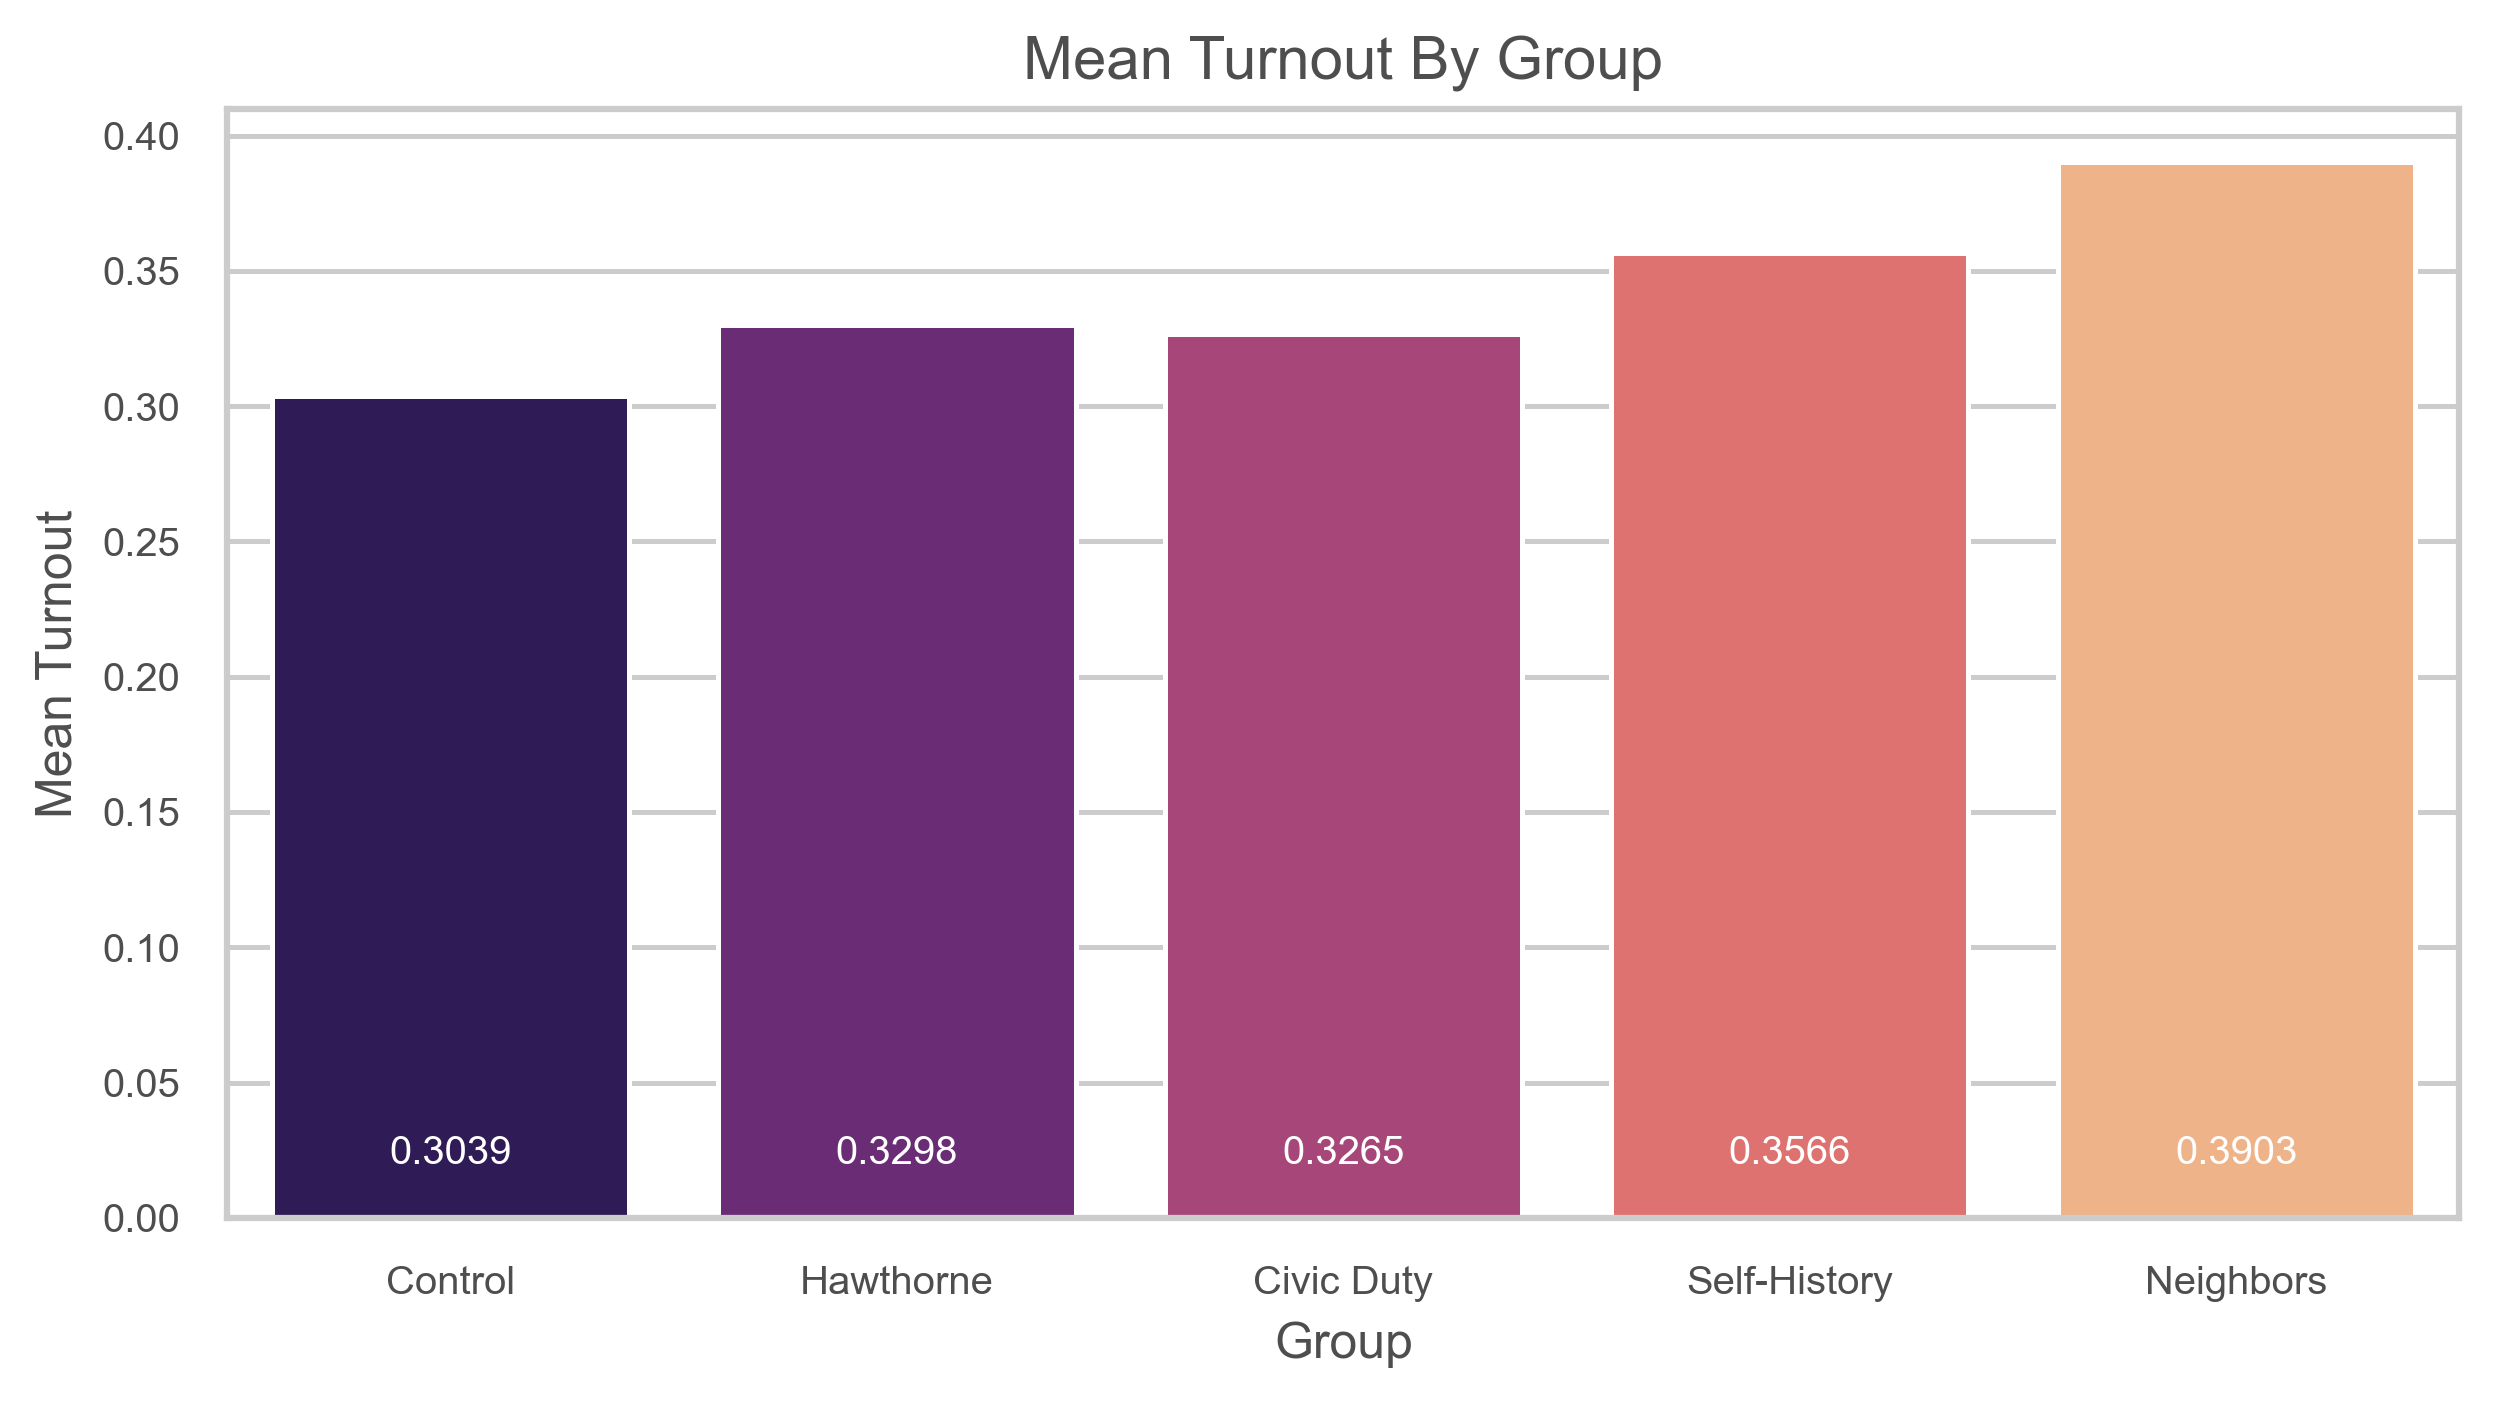

In [60]:
plt.rcParams['figure.dpi'] = 360
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(data=summary_df, x="Group", y="Mean Turnout", palette="magma")
plt.title('Mean Turnout By Group', size=12, color='#4f4e4e')
plt.xlabel('Group', size=10, color='#4f4e4e')
plt.ylabel('Mean Turnout', size=10, color='#4f4e4e')
plt.xticks(size=8, color='#4f4e4e')
plt.yticks(size=8, color='#4f4e4e')
plt.text(x=0, y=0.02, s="0.3039", 
                 color='white', fontsize=8, horizontalalignment='center')
plt.text(x=1, y=0.02, s="0.3298", 
                 color='white', fontsize=8, horizontalalignment='center')
plt.text(x=2, y=0.02, s="0.3265", 
                 color='white', fontsize=8, horizontalalignment='center')
plt.text(x=3, y=0.02, s="0.3566", 
                 color='white', fontsize=8, horizontalalignment='center')
plt.text(x=4, y=0.02, s="0.3903", 
                 color='white', fontsize=8, horizontalalignment='center')
